## Zadanie: analiza danych

Część przygotowawcza

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('HRDataset.csv', dtype={'EmpID': 'Int64', 'ManagerID': 'Int64'})
df.head()

Employee_Name       EmpID  MarriedID  MaritalStatusID  GenderID  \
0            Brown, Mia  1103024456        1.0              1.0       0.0   
1  LaRotonda, William    1106026572        0.0              2.0       1.0   
2      Steans, Tyrone    1302053333        0.0              0.0       1.0   
3       Howard, Estelle  1211050782        1.0              1.0       0.0   
4           Singh, Nan   1307059817        0.0              0.0       0.0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  PayRate  ...  \
0          1.0     1.0          3.0                     1.0    28.50  ...   
1          1.0     1.0          3.0                     0.0    23.00  ...   
2          1.0     1.0          3.0                     0.0    29.00  ...   
3          1.0     1.0          3.0                     0.0    21.50  ...   
4          1.0     1.0          3.0                     0.0    16.56  ...   

      Department         ManagerName ManagerID       RecruitmentSource  \
0  Admin Offices  Brandon R. LeBlanc         1      Diversity Job Fair   
1  Admin Offices  Brandon R. LeBlanc         1      Website Banner Ads   
2  Admin Offices  Brandon R. LeBlanc         1         Internet Search   
3  Admin Offices  Brandon R. LeBlanc         1  Pay Per Click - Google   
4  Admin Offices  Brandon R. LeBlanc         1      Website Banner Ads   

   PerformanceScore EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0       Fully Meets             2.04             2.0                  6.0   
1       Fully Meets             5.00             4.0                  4.0   
2       Fully Meets             3.90             5.0                  5.0   
3       Fully Meets             3.24             3.0                  4.0   
4       Fully Meets             5.00             3.0                  5.0   

  LastPerformanceReview_Date DaysLateLast30  
0                  1/15/2019            0.0  
1                  1/17/2019            0.0  
2                  1/18/2019            0.0  
3                        NaN            NaN  
4                  1/15/2019            0.0  

[5 rows x 35 columns]

In [21]:
df.isnull()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  \
0            False  False      False            False     False        False   
1            False  False      False            False     False        False   
2            False  False      False            False     False        False   
3            False  False      False            False     False        False   
4            False  False      False            False     False        False   
..             ...    ...        ...              ...       ...          ...   
396           True   True       True             True      True         True   
397           True   True       True             True      True         True   
398           True   True       True             True      True         True   
399           True   True       True             True      True         True   
400           True   True       True             True      True         True   

     DeptID  PerfScoreID  FromDiversityJobFairID  PayRate  ...  Department  \
0     False        False                   False    False  ...       False   
1     False        False                   False    False  ...       False   
2     False        False                   False    False  ...       False   
3     False        False                   False    False  ...       False   
4     False        False                   False    False  ...       False   
..      ...          ...                     ...      ...  ...         ...   
396    True         True                    True     True  ...        True   
397    True         True                    True     True  ...        True   
398    True         True                    True     True  ...        True   
399    True         True                    True     True  ...        True   
400    True         True                    True     True  ...        True   

     ManagerName  ManagerID  RecruitmentSource  PerformanceScore  \
0          False      False              False             False   
1          False      False              False             False   
2          False      False              False             False   
3          False      False              False             False   
4          False      False              False             False   
..           ...        ...                ...               ...   
396         True       True               True              True   
397         True       True               True              True   
398         True       True               True              True   
399         True       True               True              True   
400         True       True               True              True   

     EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  \
0               False            False                 False   
1               False            False                 False   
2               False            False                 False   
3               False            False                 False   
4               False            False                 False   
..                ...              ...                   ...   
396              True             True                  True   
397              True             True                  True   
398              True             True                  True   
399              True             True                  True   
400              True             True                  True   

     LastPerformanceReview_Date  DaysLateLast30  
0                         False           False  
1                         False           False  
2                         False           False  
3                          True            True  
4                         False           False  
..                          ...             ...  
396                        True            True  
397                        True            True  
398                        True            True  
399                  

<AxesSubplot:>

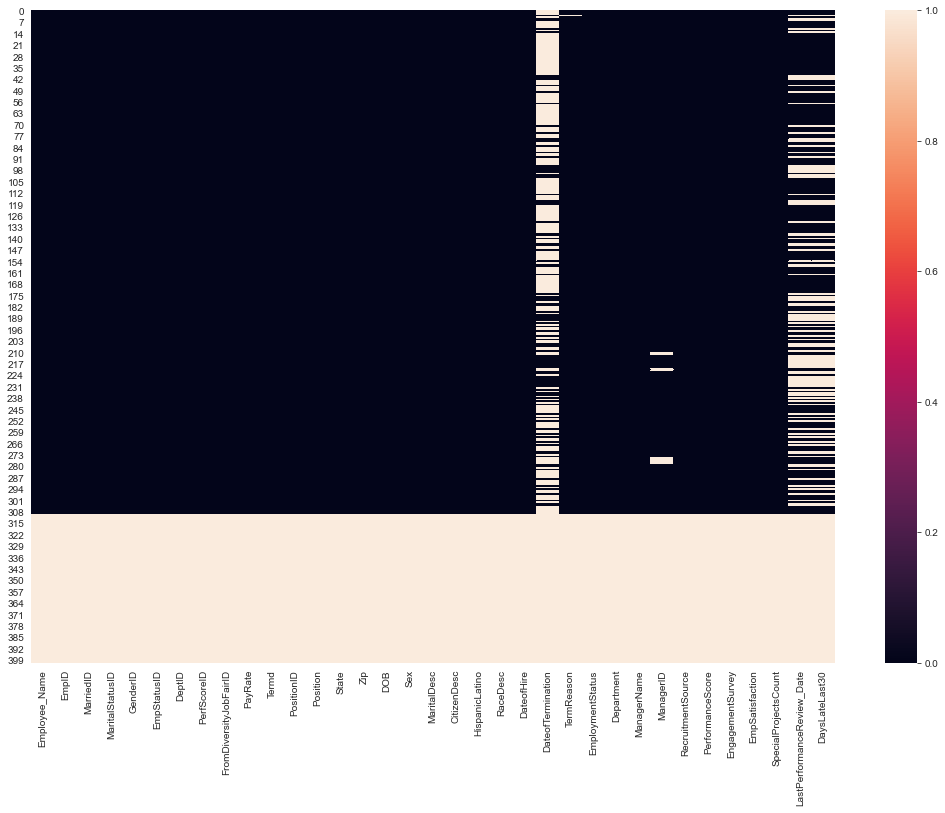

In [22]:
plt.figure(figsize=(18,12))
sns.heatmap(df.isnull())

Pozbywamy się kolumn z największą liczbą brakujących danych: LastPerformanceReview_date i DaysLateLast30.

Nie będą one też przydatne w żadnym podpunkcie tego zadania.

In [23]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

Pozbywamy się wierszy z brakującymi danymi, jest ich prawie 100.

In [24]:
df.dropna(thresh=2,inplace=True)

Sprawdzamy jak wygląda teraz kompletność bazy danych przy pomocy heatmapy.

<AxesSubplot:>

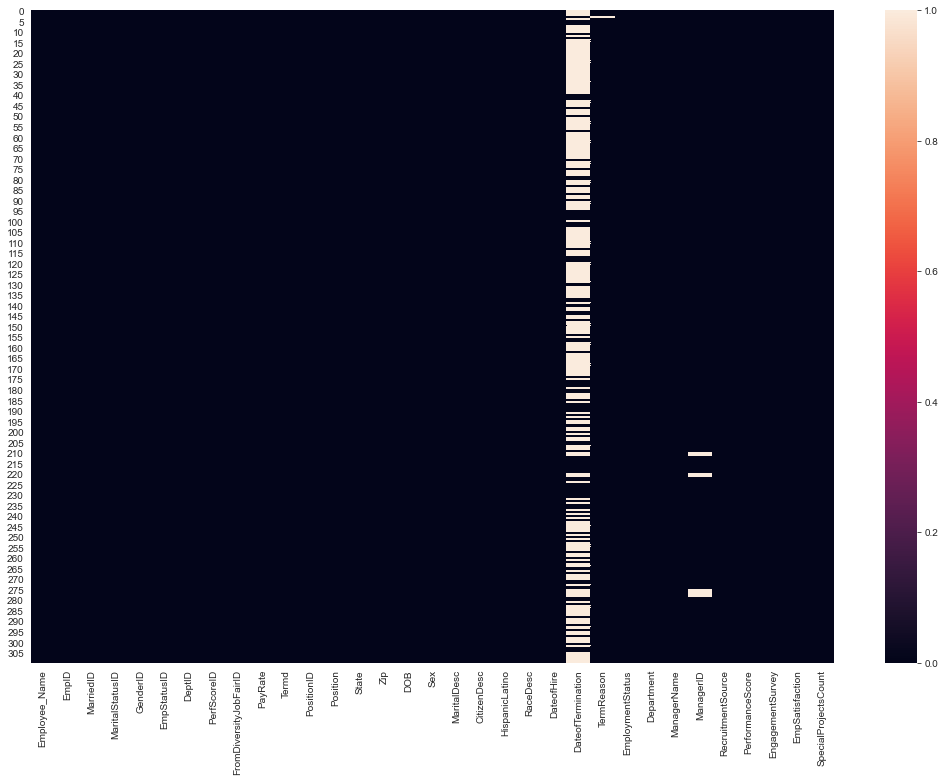

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(df.isnull())

Sprawdzamy czy kolumny, których opis sugeruje, że są datami, czy faktycznie nimi są oraz w jakim formacie są zapisane.

In [26]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [27]:
df[['DateofTermination','DOB','DateofHire']].head()

DateofTermination       DOB  DateofHire
0               NaN  11/24/87  10/27/2008
1               NaN  04/26/84    1/6/2014
2               NaN  09/01/86   9/29/2014
3          04/15/15  09/16/85   2/16/2015
4               NaN  05/19/88    5/1/2015

Ujednolicamy zapis dat w 3 kolumnach 'DateofTermination','DOB','DateofHire'.

In [28]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

Sprawdzamy czy konwersja się udała.

In [29]:
df[['DateofTermination','DOB','DateofHire']].head()

DateofTermination        DOB DateofHire
0               NaT 1987-11-24 2008-10-27
1               NaT 1984-04-26 2014-01-06
2               NaT 1986-09-01 2014-09-29
3        2015-04-15 1985-09-16 2015-02-16
4               NaT 1988-05-19 2015-05-01

### 1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [30]:
sns.set_style('darkgrid')

Dodatkowo sprawdzamy sobie ilu jest managerów i ilu pracowników przypada na każdego z nich.

In [31]:
len(df.ManagerID.dropna().unique())

23

In [32]:
len(df.ManagerName.dropna().unique())

21

In [33]:
managers = df.groupby(['ManagerName','ManagerID']).EmpID.count().to_frame()
managers

EmpID
ManagerName        ManagerID       
Alex Sweetwater    10             9
Amy Dunn           11            21
Board of Directors 9              2
Brandon R. LeBlanc 1              6
                   3              1
Brannon Miller     12            21
Brian Champaigne   13             8
David Stanley      14            21
Debra Houlihan     15             3
Elijiah Gray       16            22
Eric Dougall       6              4
Janet King         2             19
Jennifer Zamora    5              7
John Smith         17            14
Kelley Spirea      18            22
Ketsia Liebig      19            21
Kissy Sullivan     20            22
Lynn Daneault      21            13
Michael Albert     22            21
                   30             1
Peter Monroe       7             14
Simon Roup         4             17
Webster Butler     39            13

Poniżej graficzne przedstawienie powyższych danych dla każdego managera z imienia i nazwiska:

<AxesSubplot:xlabel='ManagerName'>

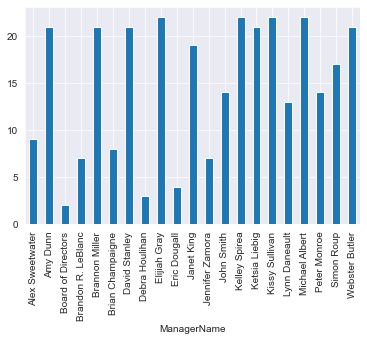

In [37]:

df.groupby('ManagerName').EmpID.count().plot(kind='bar')

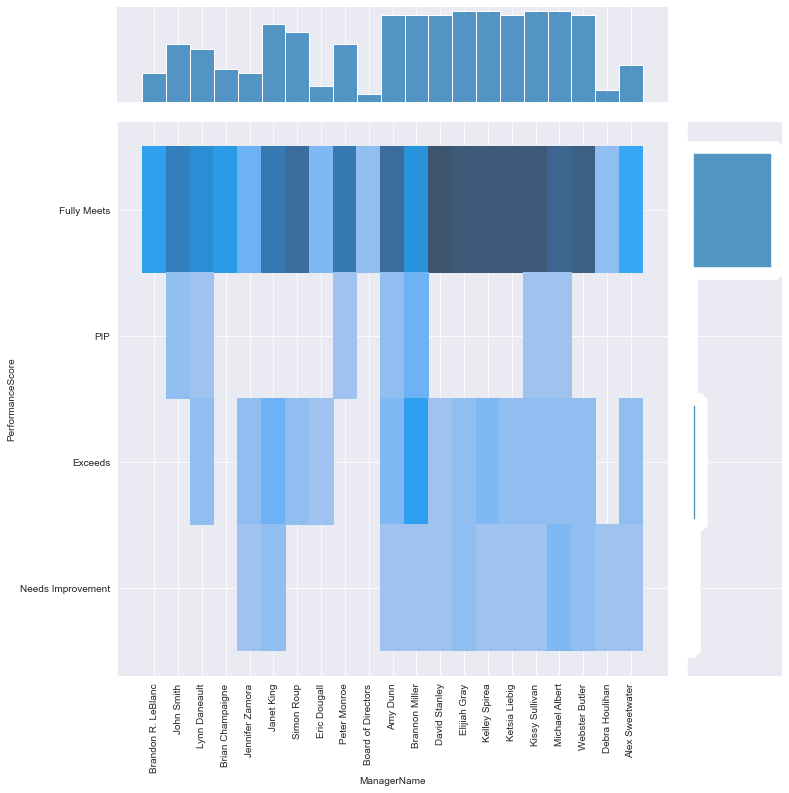

In [60]:
x = len(df.ManagerName.dropna().unique())
y = len(df.PerformanceScore.dropna().unique())
diagram = sns.jointplot(x='ManagerName',y='PerformanceScore',data=df, height=10, kind='hist', bins=x, marginal_kws={'bins': y})
plt.xticks(rotation=90)
diagram

Założenia do analizy powyższego histogramu są następujące:

- pracownicy są przpisywani do danego managera losowo,

- rozkład kompetencji w całej firmie jest taki sam i nie zależy od innych zmiennych

- managerowie oceniają swoich podwładnych tylko na podstawie obiektywnych kryteriów

- rozkład liczby pracowników przypadających na lażdego managera jest nierównomierny i wynosi od 2 do 22

- im ciemniejszy odcień koloru niebieskiego na diagramie, tym większa liczba ocen kompetencji w danej skali, co jest też uzależnione od liczby pracowników podległych danemu managerowi

Wówczas można powiedzieć, że następujący managerowie: Brandon R. LeBlanc, Brian Champaigne, Simon Roup, Board of Directors, David Stanley, Elijah Gray, Kelley Spinea, Ketsia Liebig, Kissy Sullivan i Webster Butler dobrze oceniają swoich pracowników. Oceny pozostałych managerów rozkładają się bardziej równomiernie na ich pracowników jeśli chodzi o 4-stopniową skalę oceny (Fully Meets, PtP, Exceeds, Needs Improvement), bez bardzo wyraźnej przewagi na korzyść oceny "Fully Meets".

Inny wniosek jest następujący - zdecydowana większość pracowników w firmie jest oceniana przez managerów najlepiej w 4-stopniowej skali oceny ich wydajności pracy.

### 2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

Obliczamy staż pracy w firmie. Do tego wykorzystamy fakt, że baza danych jest aktualna na dzień 27 września 2019.

In [61]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

Dodajemy nową kolumnę do bazy danych.

In [62]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [63]:
df[['DateofHire','DateofTermination','Seniority']].head()

DateofHire DateofTermination  Seniority
0 2008-10-27               NaT  10.916035
1 2014-01-06               NaT   5.722226
2 2014-09-29               NaT   4.993942
3 2015-02-16        2015-04-15   0.158799
4 2015-05-01               NaT   4.408030

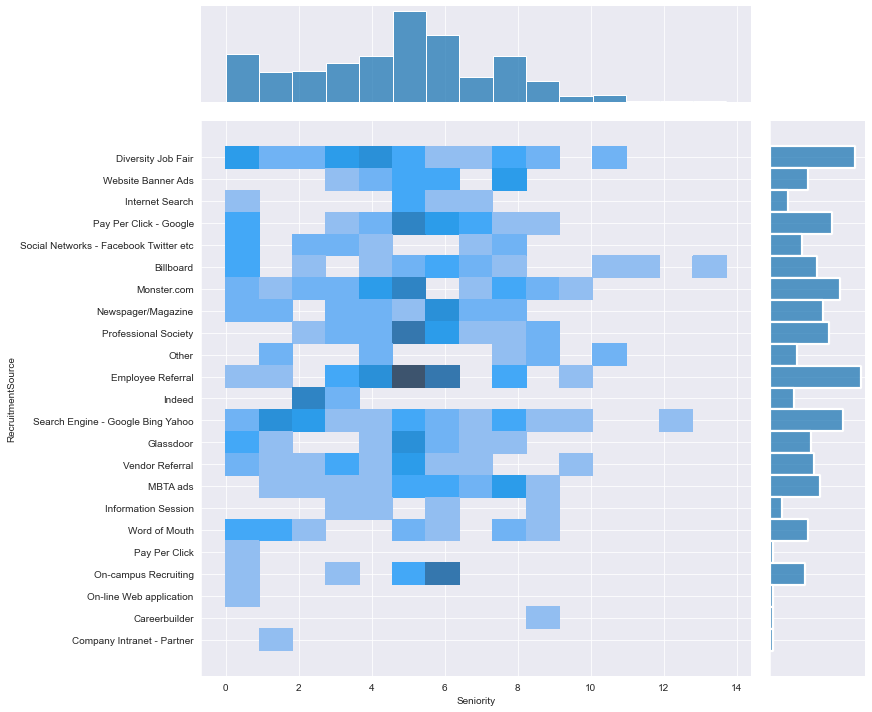

In [64]:
sns.jointplot(x='Seniority',y='RecruitmentSource',data=df, height=10, kind='hist')

Z analizy powyższego histogramu można stwierdzić, iż najdłuższy staż w firmie (ponad 10 lat) mają osoby, które zostały w niej zatrudnione w oparciu o następujące źródła pozyskiwania pracowników:

- Diversity Job Fair

- Billboard

- Search Engine - Google Bing Yahoo

- Inne (Other)

### 3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [66]:
df.MaritalDesc.unique()

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [67]:
marital_status = df.groupby(['MaritalStatusID', 'MaritalDesc']).EmpID.count().to_frame()
marital_status

EmpID
MaritalStatusID MaritalDesc       
0.0             Single         137
1.0             Married        123
2.0             Divorced        30
3.0             Separated       12
4.0             Widowed          8

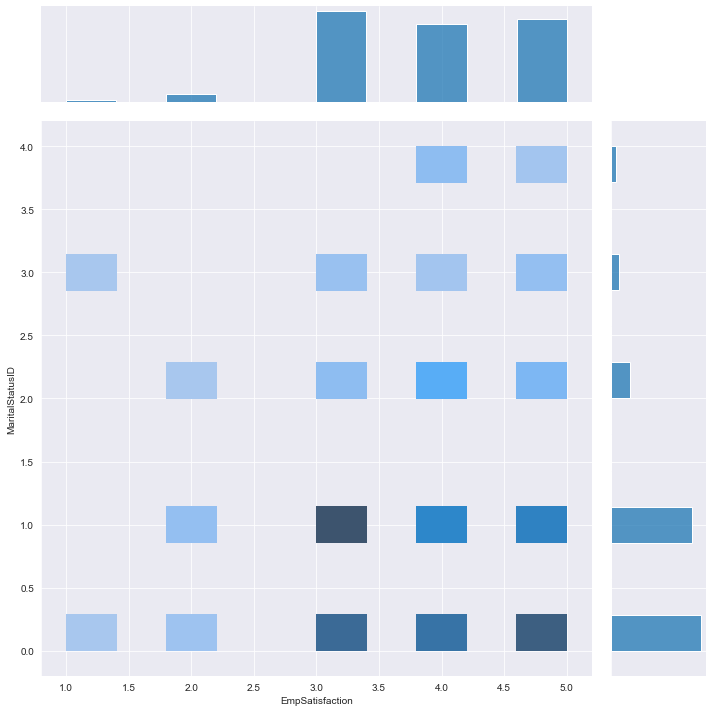

In [68]:
sns.jointplot(x='EmpSatisfaction',y='MaritalStatusID',data=df, height=10, kind='hist')

Z analizy powyższego histogramu można stwierdzić, iż największe zadowolenie z pracy wykazują osoby będące singlami, w małżeństwie oraz owdowiali. Natomiast wśród osób rozwiedzionych oraz żyjących w seperacji zadowolenie i niezadowolenie z pracy rozkłada się w obu grupach podobnie.

### 4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

Obliczamy wiek pracownika w latach na dzień przygotowania bazy danych czyli 27 września 2019.
Niektóre daty urodzenia pracowników są błędne, np zawierają rok 2052, 2065 itp. Jest to oczywista pomyłka, powinno być odpowiednio 1952 lub 1965. Musimy daty sprawdzić i odjąć od nich 100 lat.

In [69]:
def count_age(row):

    now = pd.Timestamp('now')
    end_date = dt.datetime(2019,9,27)
    
    if row['DOB'] > now:   
        row['DOB'] = row['DOB'] - pd.DateOffset(years=100)
    
    return (end_date - row['DOB'])/np.timedelta64(1,'Y')

Dodajemy nową kolumnę do bazy danych.

In [70]:
df['Age'] = df.apply(lambda row: round(count_age(row), 0),axis=1)

In [71]:
df[['DOB','Age']].head()

DOB   Age
0 1987-11-24  32.0
1 1984-04-26  35.0
2 1986-09-01  33.0
3 1985-09-16  34.0
4 1988-05-19  31.0

<AxesSubplot:xlabel='Termd', ylabel='Age'>

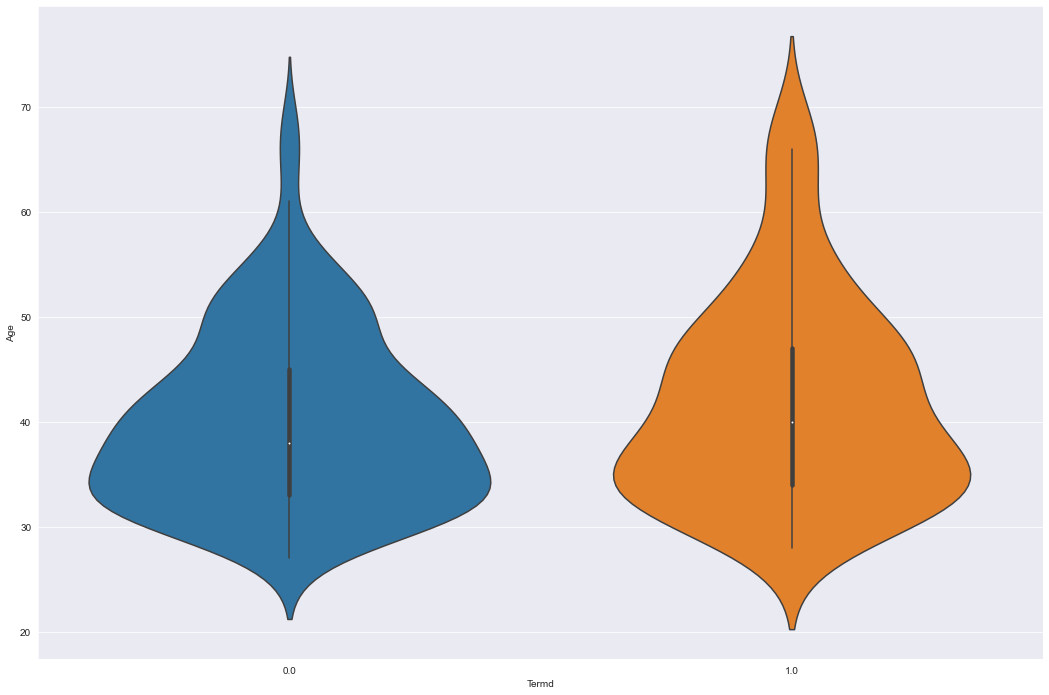

In [72]:
plt.figure(figsize=(18,12))
sns.violinplot(x='Termd',y='Age',data=df)

Wykres niebieski prezentuje pracowników firmy, którzy są wciąż w niej zatrudnieni. Wykres pomarańczowy z kolei reprezentuje byłych pracowników firmy. Analizujemy wykres niebieski.

Widzimy na jego podstawie, że najwięcej w firmie jest zatrudnionych osób między około 27 a 45 rokiem życia. Najmłodszy pracownik ma około 22 lata a najstarszy około 75 lat. Biała kropka w środku wykresu to mediana, która wynosi około 38 lat.

### 5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

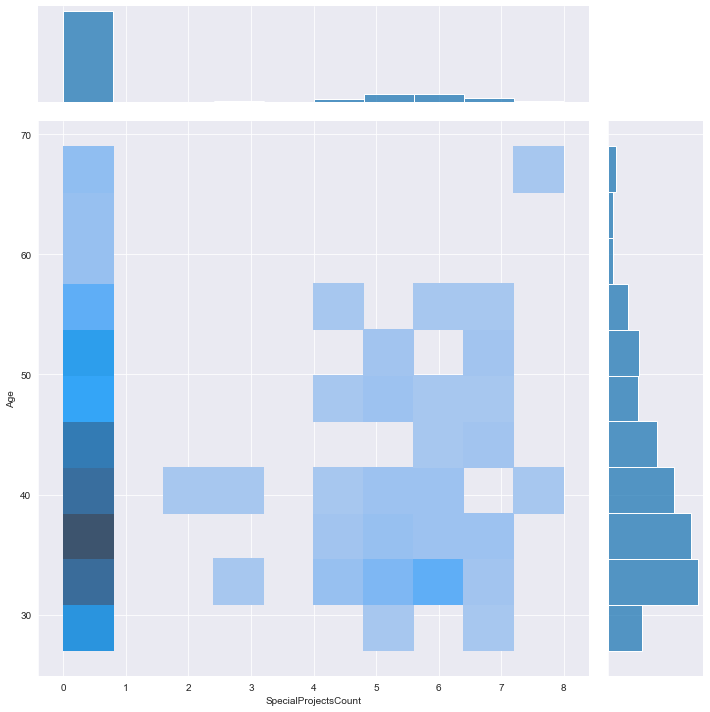

In [73]:
sns.jointplot(x='SpecialProjectsCount',y='Age',data=df, height=10, kind='hist')

Większość pracowników w firmie jest zaangażowanych tylko w 1 projekt. Nad większą liczbą projektów (od 4 do 7) pracują raczej młodsi pracownicy, w wieku między 25 a 40 lat. Aczkolwiek jest też dość spora grupa pracowników około 50-tki, którzy też są zaangażowani w większą ilość projektów, podobną jak ich młodsi koledzy.